# Context : Feature selection


Source : 


**Competition Description**
xxxx


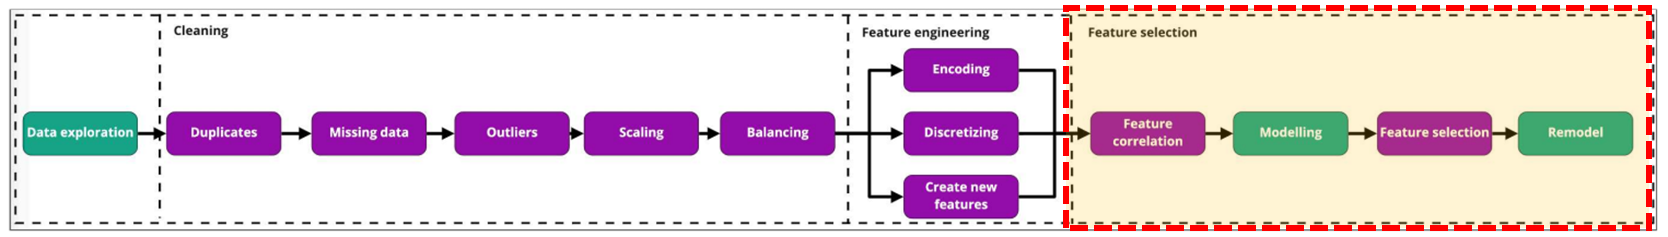


# Imports


In [1]:
# Misc
import warnings
warnings.filterwarnings(action = 'ignore')

# Basics
import pandas as pd
pd.options.display.max_columns = None
import numpy as np
from scipy.stats import iqr

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

# Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder

# Models
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, cross_validate

# Feature
from sklearn.inspection import permutation_importance


# Retrieve data


<span style="font-family:Comic Sans MS; color:red">Let's retrieve the processed data following exploration, cleaning and feature engineering :  </span>


In [2]:
# File name of the processed data
file = '20240827_162356_processed_data.json'

In [3]:
#Retrieve data
path_to_data = '../data/processed_data/'
data = pd.read_json(path_to_data + file)
data.head()


MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0         0.2    -0.265787 -0.254076          0.5            0   0.652174   
1        -0.6     0.523686  0.030015          0.0            3   0.065217   
2         0.2    -0.107893  0.437624          0.5            0   0.608696   
3         0.4    -0.528945  0.017663          0.5            0  -1.260870   
4         0.2     0.734213  1.181201          1.0            0   0.586957   

   YearRemodAdd  MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  \
0      0.883333    1.193303          3          2         4         3   
1      0.433333    0.000000          2          2         4         3   
2      0.866667    0.986301          3          2         4         3   
3      0.333333    0.000000          2          2         3         4   
4      0.833333    2.130898          3          2         4         3   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             1             6    0.452790             1           0   
1             4             5    0.834679             1           0   
2             2             6    0.143910             1           0   
3             1             5   -0.235170             1           0   
4             3             6    0.381186             1           0   

   BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0  -0.559829    -0.269652          4 -0.453608  1.173077             0   
1  -0.330769     0.538308          4  0.343643  0.000000             0   
2  -0.074359    -0.142289          4 -0.327933  1.189560             0   
3   0.106838    -0.468657          3 -0.247423  1.038462             0   
4   0.021368     0.305473          4  0.113893  1.446429             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0   0.380070             1             0  0.666667       0.5             0   
1  -0.312090             0             1  0.666667       0.0             0   
2   0.497489             1             0  0.666667       0.5             0   
3   0.390885             1             0  0.333333       0.0             0   
4   1.134029             1             0  0.666667       0.5             1   

   KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  FireplaceQu  \
0             0            3           1.0          -1            0   
1             0            2           0.0           0            3   
2             0            3           0.0           0            3   
3             0            3           0.5           0            4   
4             0            3           1.5           0            3   

   GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond  \
0     0.451220             2           0    0.281573           3           3   
1    -0.207317             2           0   -0.082816           3           3   
2     0.402439             2           0    0.530021           3           3   
3     0.329268             1           1    0.670807           3           3   
4     0.378049             2           1    1.474120           3           3   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0    0.000000     0.529412              0          0            0         0   
1    1.773810    -0.367647              0          0            0         0   
2    0.000000     0.250000              0          0            0         0   
3    0.000000     0.147059            272          0            0         0   
4    1.142857     0.867647              0          0            0         0   

   MiscVal    MoSold  YrSold  SalePrice  MSZoning_C (all)  MSZoning_FV  \
0        0  0.090909    0.50     208500                 0            0   
1        0  0.363636    0.25     181500                 0            0   
2        0  0.727273    0.50     223500                 0            0   
3        0  0.090909    0.00     140000                 0            0   
4      

#  Feature correlation


In [4]:
# Defining the target name
target_name = 'SalePrice'

## Correlation heatmap

<span style="font-family:Comic Sans MS; color:red"> /!\ Use only if number of features is reasonnable !  </span>



In [5]:
# # Heatmap of pairwise correlations
# correlation_matrix = data.corr()
# column_names = correlation_matrix.columns
# sns.heatmap(correlation_matrix, xticklabels=column_names, yticklabels=column_names,cmap= "bwr");

## Correlation matrix


### Pair correlation

In [6]:
#Create a dataframe listing pair correlations and absolute correlations
correlation_matrix = data.corr()

# Converting the correlation matrix into a DataFrame
corr_df = correlation_matrix.stack().reset_index()

# Renaming the columns
corr_df.columns = ['feature_1','feature_2', 'correlation']

# Remove "self correlations"
no_self_correlation = (corr_df['feature_1'] != corr_df['feature_2'])
corr_df = corr_df[no_self_correlation]

corr_df['absolute_correlation'] = np.abs(corr_df['correlation'])

corr_df.sort_values(by="absolute_correlation", ascending=False, inplace = True)
corr_df

feature_1              feature_2   correlation  \
37820     Exterior2nd_CBlock     Exterior1st_CBlock  1.000000e+00   
34325     Exterior1st_CBlock     Exterior2nd_CBlock  1.000000e+00   
54747  SaleCondition_Partial           SaleType_New  9.868190e-01   
52883           SaleType_New  SaleCondition_Partial  9.868190e-01   
39934    Exterior2nd_VinylSd    Exterior1st_VinylSd  9.775249e-01   
...                      ...                    ...           ...   
436              LotFrontage         Functional_Sev  2.630631e-14   
371              LotFrontage         RoofMatl_Metal  2.630584e-14   
32059         RoofMatl_Metal            LotFrontage  2.630584e-14   
13750           LotShape_IR3      Foundation_BrkTil  1.489230e-17   
41710      Foundation_BrkTil           LotShape_IR3  1.489230e-17   

       absolute_correlation  
37820          1.000000e+00  
34325          1.000000e+00  
54747          9.868190e-01  
52883          9.868190e-01  
39934          9.775249e-01  
...                     ...  
436            2.630631e-14  
371            2.630584e-14  
32059          2.630584e-14  
13750          1.489230e-17  
41710          1.489230e-17  

[54522 rows x 4 columns]

<span style="font-family:Comic Sans MS; color:red"> /!\ Check columns with high correlations (greater than a threshold) !  </span>





In [7]:
# Remove highly correlated features >= threshold (absolute_value)
correlation_threshold = 0.99
correlated_features = corr_df[(corr_df['absolute_correlation'] >= correlation_threshold)]
print(correlated_features.shape)
correlated_features

(2, 4)


feature_1           feature_2  correlation  \
37820  Exterior2nd_CBlock  Exterior1st_CBlock          1.0   
34325  Exterior1st_CBlock  Exterior2nd_CBlock          1.0   

       absolute_correlation  
37820                   1.0  
34325                   1.0

<span style="font-family:Comic Sans MS; color:red"> Let's remove duplicates between feat_1 and feat_2 !  </span>






In [8]:
# Create a set from feature_1 and feature_2
correlated_features['Set'] = correlated_features.apply(lambda row : {row['feature_1'], row['feature_2']}, axis=1)

# Cast elements of sets to string 
correlated_features['Set'] = correlated_features['Set'].apply(lambda x : str(x))
correlated_features

# Drop duplicates in set column (no more duplicates between feature_1 and feature_2)
correlated_features.drop_duplicates(subset=['Set'], inplace=True)

# Drop Set column => No use anymore
correlated_features.drop(columns=['Set'], inplace=True)

print(correlated_features.shape)
correlated_features

(1, 4)


feature_1           feature_2  correlation  \
37820  Exterior2nd_CBlock  Exterior1st_CBlock          1.0   

       absolute_correlation  
37820                   1.0

<span style="font-family:Comic Sans MS; color:red"> Let's drop columns with high correlations (i.e correlation greater than a threshold) !  </span>








In [9]:
# Columns to drop because of high correlation with other columns
high_corr_feat_to_drop = correlated_features['feature_2'].values.tolist()
high_corr_feat_to_drop

['Exterior1st_CBlock']

### Correlation with target

In [10]:
# Number of high correlated features wanted
high_corr_feats = 5

#Create a dataframe listing correlations between a feature and the target and absolute correlations
corr_df[corr_df["feature_1"] == target_name].head(high_corr_feats).head()

feature_1    feature_2  correlation  absolute_correlation
11469  SalePrice  OverallQual     0.790982              0.790982
11489  SalePrice    GrLivArea     0.708624              0.708624
11474  SalePrice    ExterQual     0.682639              0.682639
11496  SalePrice  KitchenQual     0.659600              0.659600
11502  SalePrice   GarageCars     0.640409              0.640409

In [11]:
# Extract columns that have high correlation with target (i.e correlation > threshold)
corr_condition_target = (corr_df["feature_1"] == target_name) & (corr_df["absolute_correlation"] > correlation_threshold)

high_corr_with_target = corr_df[corr_condition_target]['feature_2'].values.tolist()
high_corr_with_target

[]

<span style="font-family:Comic Sans MS; color:red"> Let's drop columns with high correlation with target (i.e correlation greater than a threshold) !  </span>







In [12]:
# # Drop
# print(data.shape)
# data = data.drop(columns=high_corr_with_target)
# print(data.shape)

### Scatter matrix with high correlated features with the target value



In [13]:
#Retrieve a list of the most correlated features to the target (max = threshold)
high_corr_feats_serie = corr_df[corr_df["feature_1"] == target_name]['feature_2']
high_corr_feats_list = high_corr_feats_serie[:high_corr_feats].values.tolist()

# Add target name to the list of high correlated features (relatively to the target)
high_corr_feats_list.append(target_name)

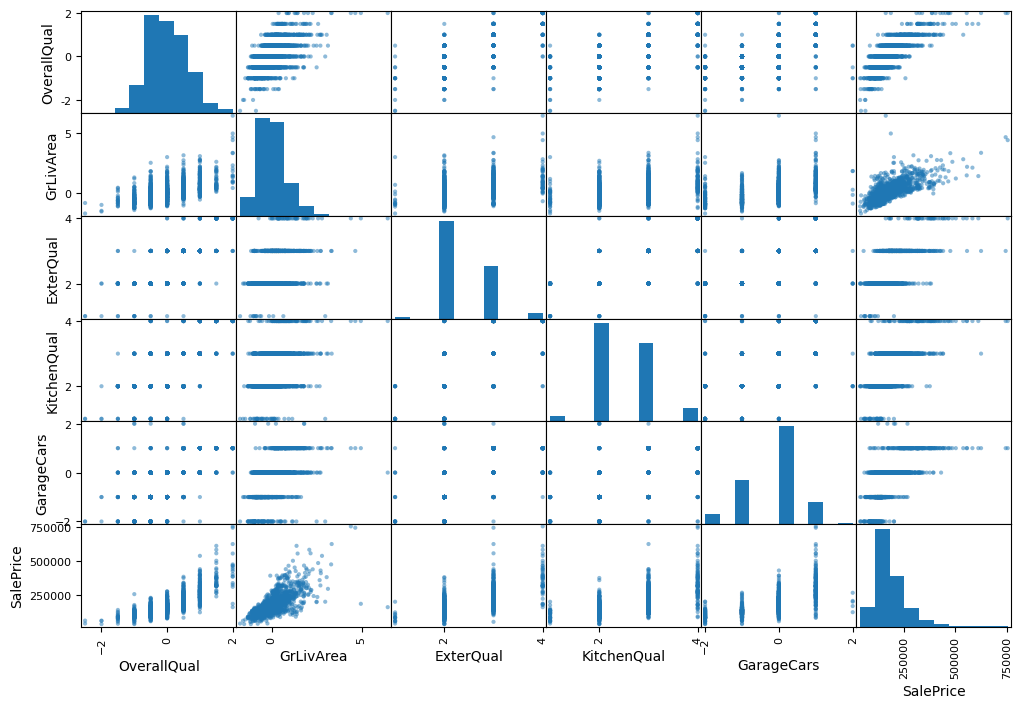

In [14]:
# Display scatter matrix for numerical
scatter_matrix(data[high_corr_feats_list], figsize= (12,8))
plt.show()

### Columns to drop due to high correlation with other columns




In [15]:
# Drop
print(data.shape)
data.drop(columns=high_corr_feat_to_drop, inplace=True)
print(data.shape)

(1460, 234)
(1460, 233)


# Modelling

## Define X and y 


<span style="font-family:Comic Sans MS; color:red"> Let's define X and y !  </span>




In [16]:
# X : features
X = data.drop(columns=target_name)
X.head(5)

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0         0.2    -0.265787 -0.254076          0.5            0   0.652174   
1        -0.6     0.523686  0.030015          0.0            3   0.065217   
2         0.2    -0.107893  0.437624          0.5            0   0.608696   
3         0.4    -0.528945  0.017663          0.5            0  -1.260870   
4         0.2     0.734213  1.181201          1.0            0   0.586957   

   YearRemodAdd  MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  \
0      0.883333    1.193303          3          2         4         3   
1      0.433333    0.000000          2          2         4         3   
2      0.866667    0.986301          3          2         4         3   
3      0.333333    0.000000          2          2         3         4   
4      0.833333    2.130898          3          2         4         3   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             1             6    0.452790             1           0   
1             4             5    0.834679             1           0   
2             2             6    0.143910             1           0   
3             1             5   -0.235170             1           0   
4             3             6    0.381186             1           0   

   BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0  -0.559829    -0.269652          4 -0.453608  1.173077             0   
1  -0.330769     0.538308          4  0.343643  0.000000             0   
2  -0.074359    -0.142289          4 -0.327933  1.189560             0   
3   0.106838    -0.468657          3 -0.247423  1.038462             0   
4   0.021368     0.305473          4  0.113893  1.446429             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0   0.380070             1             0  0.666667       0.5             0   
1  -0.312090             0             1  0.666667       0.0             0   
2   0.497489             1             0  0.666667       0.5             0   
3   0.390885             1             0  0.333333       0.0             0   
4   1.134029             1             0  0.666667       0.5             1   

   KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  FireplaceQu  \
0             0            3           1.0          -1            0   
1             0            2           0.0           0            3   
2             0            3           0.0           0            3   
3             0            3           0.5           0            4   
4             0            3           1.5           0            3   

   GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond  \
0     0.451220             2           0    0.281573           3           3   
1    -0.207317             2           0   -0.082816           3           3   
2     0.402439             2           0    0.530021           3           3   
3     0.329268             1           1    0.670807           3           3   
4     0.378049             2           1    1.474120           3           3   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0    0.000000     0.529412              0          0            0         0   
1    1.773810    -0.367647              0          0            0         0   
2    0.000000     0.250000              0          0            0         0   
3    0.000000     0.147059            272          0            0         0   
4    1.142857     0.867647              0          0            0         0   

   MiscVal    MoSold  YrSold  MSZoning_C (all)  MSZoning_FV  MSZoning_RH  \
0        0  0.090909    0.50                 0            0            0   
1        0  0.363636    0.25                 0            0            0   
2        0  0.727273    0.50                 0            0            0   
3        0  0.090909    0.00                 0            0            0 

In [17]:
#  y : Target
y = data[target_name]
y.head(5)

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

##  Traint test split


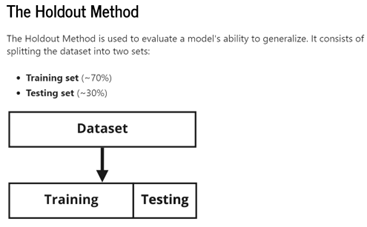


In [18]:
# Separating train set from test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
# Display shapes
print(f"Shape of X_train : {X_train.shape}")
print(f"Shape of X_test : {X_test.shape}")
print(f"Shape of y_train : {y_train.shape}")
print(f"Shape of y_test : {y_test.shape}")

Shape of X_train : (1022, 232)
Shape of X_test : (438, 232)
Shape of y_train : (1022,)
Shape of y_test : (438,)


## Base model


In [20]:
# Model to be cross-validated
lin_model = LinearRegression()

In [21]:
# Scoring method
scoring_method = 'neg_mean_squared_error'

In [22]:
# Cross validation
cv_results = cross_validate(estimator = lin_model,
                            X = X,
                            y = y,
                            cv = 5,
                            n_jobs= -1,
                            verbose=0,
                            scoring= None)

mean_score = cv_results['test_score'].mean()

print(f"The mean score is : {mean_score}")


The mean score is : -456882743767861.9


In [23]:
# Cross Validation
np.mean(cross_val_score(lin_model, 
                        X, 
                        y , 
                        cv=5, 
                        scoring=None))

-27351234269814.227

# Feature selection

## Feature permutation

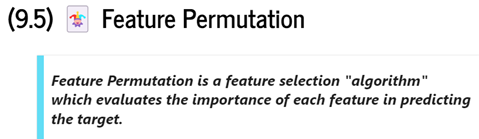


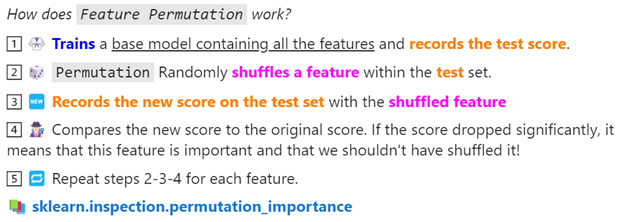


In [24]:
# Fit model
lin_model = LinearRegression().fit(X, y) 

# Performs Permutation
permutation_score = permutation_importance(lin_model, X, y, n_repeats=10) 

# Unstack results showing the decrease in performance after shuffling features
importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T) 
importance_df.columns=['feature','score decrease']

# Show the important features
importance_df = importance_df.sort_values(by="score decrease", ascending = False) 
importance_df


feature        score decrease
23       GrLivArea   31371959701317976.0
21        2ndFlrSF   21804914531179324.0
20        1stFlrSF   17223863350071244.0
22    LowQualFinSF  269201294098662.9375
14      BsmtFinSF1  81028602117125.90625
..             ...                   ...
188   CentralAir_Y               0.00002
48          YrSold              0.000005
34     GarageYrBlt              0.000004
42   EnclosedPorch              0.000004
46         MiscVal             -0.000001

[232 rows x 2 columns]

## Extract strongest features

In [26]:
importance_df.head(20)

feature         score decrease
23           GrLivArea    31371959701317976.0
21            2ndFlrSF    21804914531179324.0
20            1stFlrSF    17223863350071244.0
22        LowQualFinSF   269201294098662.9375
14          BsmtFinSF1   81028602117125.90625
17           BsmtUnfSF  75949445155212.265625
18         TotalBsmtSF   74704215756057.96875
16          BsmtFinSF2   9957698741778.332031
52         MSZoning_RL          972052.066709
53         MSZoning_RM          743428.124207
121  HouseStyle_1Story          252569.137763
50         MSZoning_FV          248582.790023
124  HouseStyle_2Story          215269.272405
119  HouseStyle_1.5Fin           95697.125819
216           Fence_NA           84773.910072
114      BldgType_1Fam           84030.649401
51         MSZoning_RH            62648.97894
214        Fence_MnPrv           52241.488539
118    BldgType_TwnhsE           44045.640036
126    HouseStyle_SLvl           43297.435127

# Remodel